In [51]:
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile
import numpy as np
%matplotlib inline
import snewpy
from snewpy.models.ccsn import Nakazato_2013, OConnor_2013, Bollig_2016
from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence, NonAdiabaticMSWH, TwoFlavorDecoherence, CompleteExchange, NeutrinoDecay, AdiabaticMSWes
import seaborn as sns
# from snewpy.models import SNOwGLoBES
# from snewpy import snowglobes
import os

In [52]:
current_palette = sns.color_palette('colorblind', 10)

## Bollig

In [53]:
Bollig_2016.param

{'progenitor_mass': <Quantity [11.2, 27. ] solMass>}

In [54]:
m11 = Bollig_2016(progenitor_mass=11.2*u.solMass)
m27 = Bollig_2016(progenitor_mass=27*u.solMass)

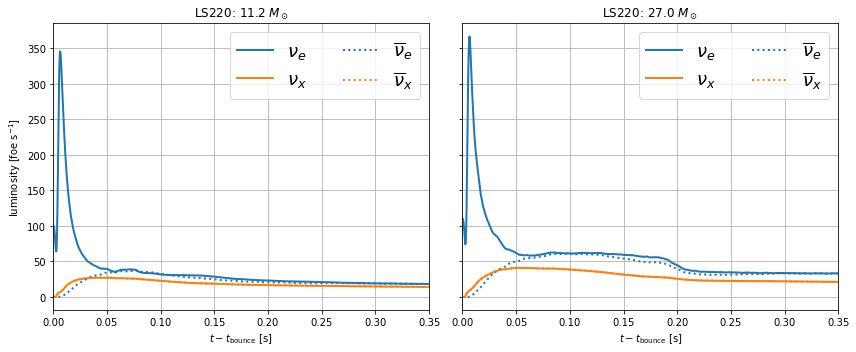

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True, tight_layout=True)

for i, model in enumerate([m11, m27]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(model.time, model.luminosity[flavor]/1e51,  # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':',
                lw=2)
    ax.set(xlim=(0.0, 0.35),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           title=r'{}: {} $M_\odot$'.format(model.metadata['EOS'], model.metadata['Progenitor mass'].value))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=18)

axes[0].set(ylabel=r'luminosity [foe s$^{-1}$]');

### Inspired by fig 7 in Janka

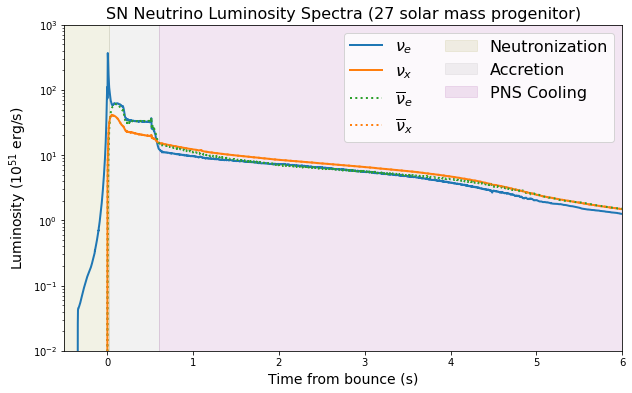

In [143]:
# plt.figure(figsize=(10,6), dpi=1200)
plt.figure(figsize=(10,6))

for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
plt.xlim(-0.5, 6)
plt.ylim(1e-2,1e3)
plt.yscale('log')
plt.xlabel("Time from bounce (s)", fontsize=14)
plt.ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=14)
# plt.axvline(x=0.02, color='red')
plt.axvspan(-0.5,0.02, alpha=0.1, color='olive', label='Neutronization')
plt.axvspan(0.02, 0.6, alpha=0.1, color='gray', label='Accretion')
plt.axvspan(0.6, 6, alpha=0.1, color='purple', label='PNS Cooling')
plt.title("SN Neutrino Luminosity Spectra (27 solar mass progenitor)", fontsize=16)
plt.legend(ncol=2, fontsize=16)
# plt.savefig('plots/full_lum_init.png', facecolor='white', dpi=1200)

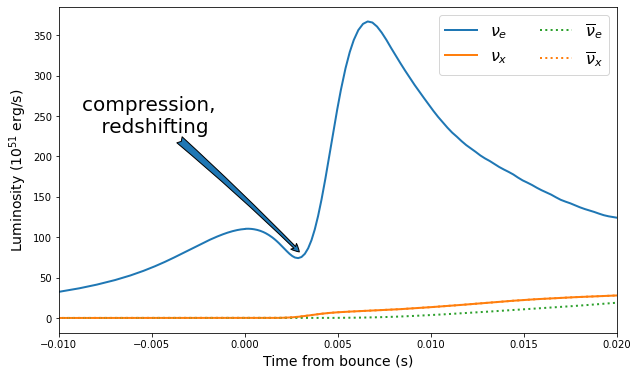

In [28]:
# Neutronization region
plt.figure(figsize=(10,6))#, dpi=1200)
for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
plt.xlim(-0.01, 0.02)
# plt.ylim(1e-2,50)
# plt.yscale('log')
plt.xlabel("Time from bounce (s)", fontsize=14)
plt.ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=14)
# plt.axvline(x=0.02, color='red')
# plt.annotate("compression, \n redshifting", color="black", 
#             xy=(0.003, 80), xycoords='data', 
#             xytext=(-0.005, 250), textcoords='data', size=20, va='center', ha='center',
# #             bbox=dict(boxstyle="round4", fc="w"),
#             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3, rad=-0.02"))
# plt.title("Neutronization Phase", fontsize=16)
plt.legend(ncol=2, fontsize=16)
# plt.savefig('plots/neutronization_lum.png', facecolor='white', dpi=1200)

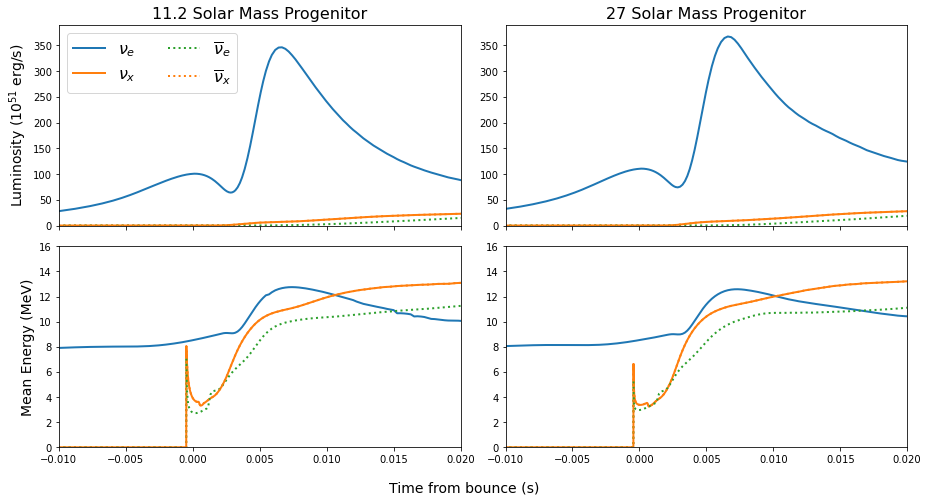

In [136]:
# Neutronization region
fig, ((ax0, ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(13, 7), sharex=True)

for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        ax0.plot(m11.time, m11.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax2.plot(m11.time, m11.meanE[flavor], label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax3.plot(m27.time, m27.meanE[flavor], label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        ax0.plot(m11.time, m11.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax2.plot(m11.time, m11.meanE[flavor], label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax3.plot(m27.time, m27.meanE[flavor], label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        
# plt.xlim(-0.01, 0.02)
ax0.set_xlim(-0.01, 0.02)
ax0.set_ylim(0,390)
ax1.set_ylim(0,390)
ax2.set_ylim(0,16)
ax3.set_ylim(0,16)
ax0.set_title("11.2 Solar Mass Progenitor", fontsize=16)
ax1.set_title("27 Solar Mass Progenitor", fontsize=16)
# plt.ylim(1e-2,50)
# plt.yscale('log')
fig.supxlabel("Time from bounce (s)", fontsize=14)
ax0.set_ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=14)
ax2.set_ylabel("Mean Energy (MeV)", fontsize=14)


# plt.axvline(x=0.02, color='red')
# plt.annotate("compression, redshifting", color="blue", 
#             xy=(0.003, 8), xycoords='data', 
#             xytext=(-0.005, 25), textcoords='data', size=20, va='center', ha='center',
#             bbox=dict(boxstyle="round4", fc="w"),
#             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))
# plt.title("Neutronization Phase", fontsize=16)
ax0.legend(ncol=2, fontsize=16)
plt.tight_layout()
# plt.savefig('plots/neutronization_compare_bollig.png', facecolor='white', dpi=1200)

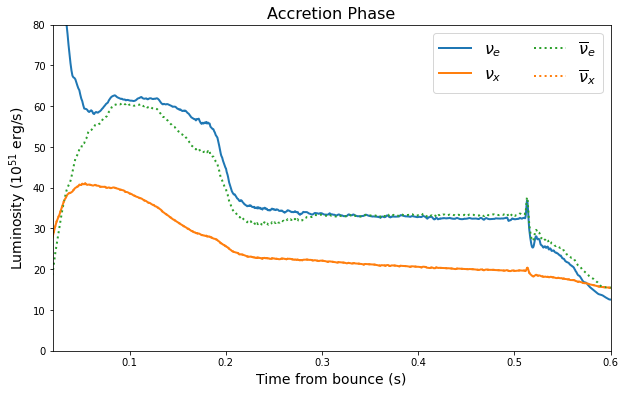

In [4]:
# Post-bounce accretion phase
plt.figure(figsize=(10,6))#, dpi=1200)
for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
plt.xlim(0.02, 0.6)
plt.ylim(0,80)
# plt.yscale('log')
plt.xlabel("Time from bounce (s)", fontsize=14)
plt.ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=14)
# plt.axvline(x=0.02, color='red')
# plt.annotate("compression, redshifting", color="blue", 
#             xy=(0.003, 8), xycoords='data', 
#             xytext=(-0.005, 25), textcoords='data', size=20, va='center', ha='center',
#             bbox=dict(boxstyle="round4", fc="w"),
#             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))
plt.title("Accretion Phase", fontsize=16)
plt.legend(ncol=2, fontsize=16)
# plt.savefig('plots/accretion_lum.png', facecolor='white', dpi=1200)

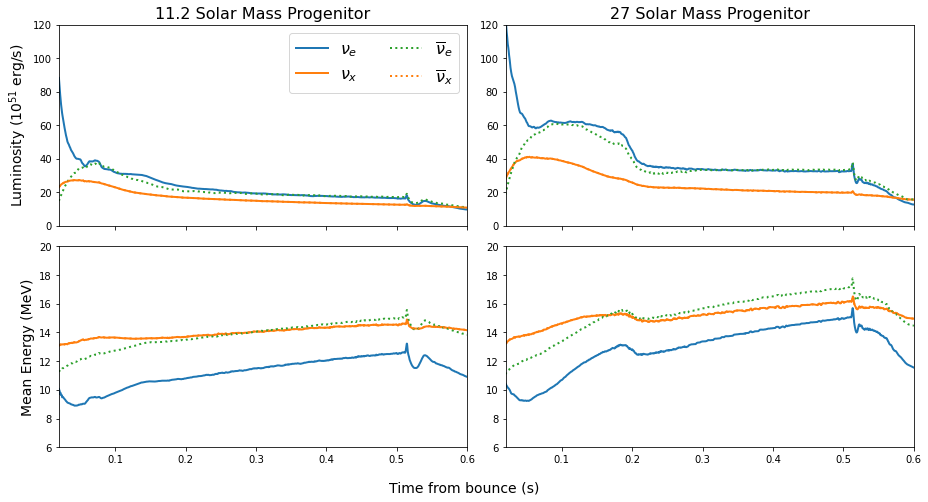

In [137]:
fig, ((ax0, ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(13, 7), sharex=True)

for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        ax0.plot(m11.time, m11.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax2.plot(m11.time, m11.meanE[flavor], label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax3.plot(m27.time, m27.meanE[flavor], label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        ax0.plot(m11.time, m11.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax2.plot(m11.time, m11.meanE[flavor], label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax3.plot(m27.time, m27.meanE[flavor], label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        
# plt.xlim(-0.01, 0.02)
ax0.set_xlim(0.02, 0.6)
ax0.set_ylim(0,120)
ax1.set_ylim(0,120)
ax2.set_ylim(6,20)
ax3.set_ylim(6,20)
ax0.set_title("11.2 Solar Mass Progenitor", fontsize=16)
ax1.set_title("27 Solar Mass Progenitor", fontsize=16)
# plt.ylim(1e-2,50)
# plt.yscale('log')
fig.supxlabel("Time from bounce (s)", fontsize=14)
ax0.set_ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=14)
ax2.set_ylabel("Mean Energy (MeV)", fontsize=14)


# plt.axvline(x=0.02, color='red')
# plt.annotate("compression, redshifting", color="blue", 
#             xy=(0.003, 8), xycoords='data', 
#             xytext=(-0.005, 25), textcoords='data', size=20, va='center', ha='center',
#             bbox=dict(boxstyle="round4", fc="w"),
#             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))
# plt.title("Neutronization Phase", fontsize=16)
ax0.legend(ncol=2, fontsize=16)
plt.tight_layout()
# plt.savefig('plots/accretion_compare_bollig.png', facecolor='white', dpi=1200)

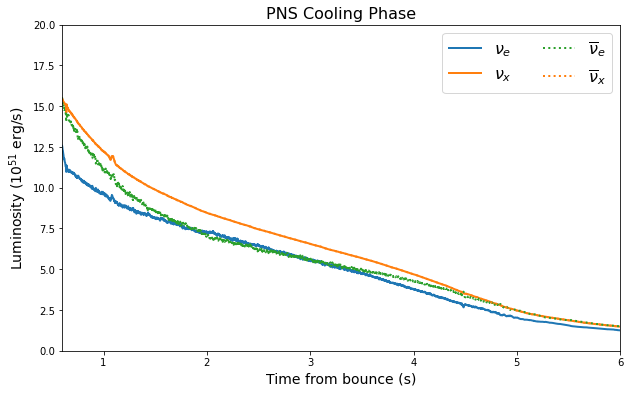

In [6]:
# PNS cooling phase
plt.figure(figsize=(10,6))#, dpi=1200)
for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        plt.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
plt.xlim(0.6, 6)
plt.ylim(0,20)
# plt.yscale('log')
plt.xlabel("Time from bounce (s)", fontsize=14)
plt.ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=14)
# plt.axvline(x=0.02, color='red')
# plt.annotate("compression, redshifting", color="blue", 
#             xy=(0.003, 8), xycoords='data', 
#             xytext=(-0.005, 25), textcoords='data', size=20, va='center', ha='center',
#             bbox=dict(boxstyle="round4", fc="w"),
#             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))
plt.title("PNS Cooling Phase", fontsize=16)
plt.legend(ncol=2, fontsize=16)
# plt.savefig('plots/cooling_lum.png', facecolor='white', dpi=1200)

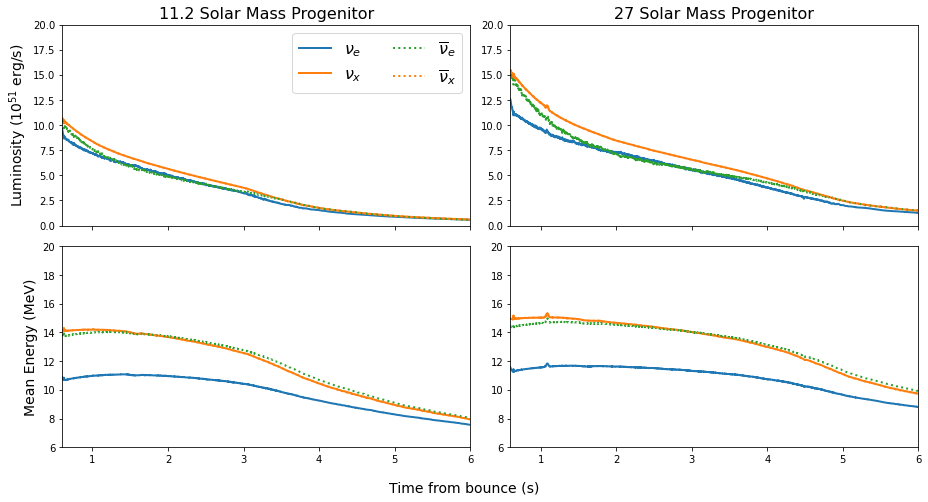

In [139]:
fig, ((ax0, ax1),(ax2,ax3)) = plt.subplots(2,2, figsize=(13, 7), sharex=True)

for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        ax0.plot(m11.time, m11.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax2.plot(m11.time, m11.meanE[flavor], label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax3.plot(m27.time, m27.meanE[flavor], label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        ax0.plot(m11.time, m11.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax2.plot(m11.time, m11.meanE[flavor], label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax3.plot(m27.time, m27.meanE[flavor], label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        
# plt.xlim(-0.01, 0.02)
ax0.set_xlim(0.6, 6)
ax0.set_ylim(0,20)
ax1.set_ylim(0,20)
ax2.set_ylim(6,20)
ax3.set_ylim(6,20)
ax0.set_title("11.2 Solar Mass Progenitor", fontsize=16)
ax1.set_title("27 Solar Mass Progenitor", fontsize=16)
# plt.ylim(1e-2,50)
# plt.yscale('log')
fig.supxlabel("Time from bounce (s)", fontsize=14)
ax0.set_ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=14)
ax2.set_ylabel("Mean Energy (MeV)", fontsize=14)


# plt.axvline(x=0.02, color='red')
# plt.annotate("compression, redshifting", color="blue", 
#             xy=(0.003, 8), xycoords='data', 
#             xytext=(-0.005, 25), textcoords='data', size=20, va='center', ha='center',
#             bbox=dict(boxstyle="round4", fc="w"),
#             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))
# plt.title("Neutronization Phase", fontsize=16)
ax0.legend(ncol=2, fontsize=16)
plt.tight_layout()
# plt.savefig('plots/cooling_compare_bollig.png', facecolor='white', dpi=1200)

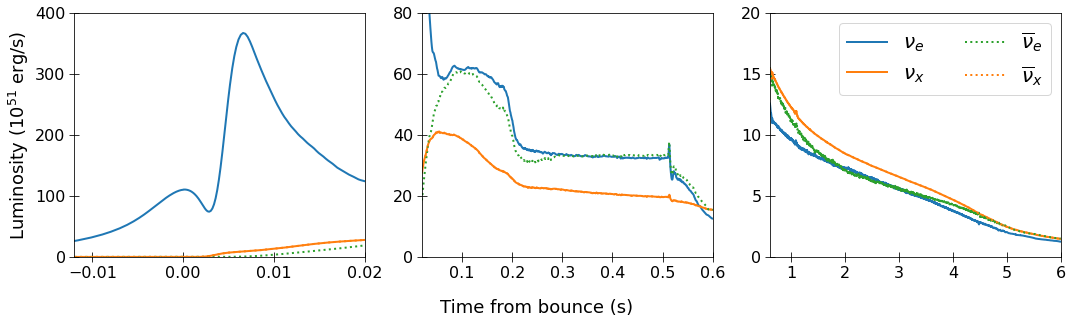

In [50]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15, 4.5))

for flavor in Flavor:
    if flavor.is_electron and flavor.is_antineutrino:
        ax0.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
        ax2.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C2', ls=':', lw=2)
    else:
        ax0.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax1.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
        ax2.plot(m27.time, m27.luminosity[flavor]/1e51, label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
    
# plt.xlim(-0.01, 0.02)
ax0.set_xlim(-0.012, 0.02)
ax1.set_xlim(0.02, 0.6)
ax2.set_xlim(0.6,6)
ax0.set_ylim(0,400)
ax1.set_ylim(0,80)
ax2.set_ylim(0,20)
# ax3.set_ylim(6,20)
ax0.tick_params(labelsize=16, direction='inout', length=10)
ax1.tick_params(labelsize=16, direction='inout', length=10)
ax2.tick_params(labelsize=16, direction='inout', length=10)

ax0.set_xticks([-0.01, 0, 0.01, 0.02])
# ax0.set_yticks([0, 100, 200,])
# ax0.set_title("Neutrino Luminosity", fontsize=16)
# plt.ylim(1e-2,50)
# plt.yscale('log')
fig.supxlabel("Time from bounce (s)", fontsize=18)
ax0.set_ylabel(r"Luminosity ($10^{51}$ erg/s)", fontsize=18)
# ax2.set_ylabel("Mean Energy (MeV)", fontsize=14)

# ax0.set_xlabel("(a)", fontsize=18)
# ax1.set_xlabel("(b)", fontsize=18)
# ax2.set_xlabel("(c)", fontsize=18)


# plt.axvline(x=0.02, color='red')
# plt.annotate("compression, redshifting", color="blue", 
#             xy=(0.003, 8), xycoords='data', 
#             xytext=(-0.005, 25), textcoords='data', size=20, va='center', ha='center',
#             bbox=dict(boxstyle="round4", fc="w"),
#             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=-0.2"))
# plt.title("Neutronization Phase", fontsize=16)
ax2.legend(ncol=2, fontsize=20)
plt.tight_layout()
plt.savefig('plots/luminosities.png', facecolor='white', dpi=1200)

## Flavor Transformation

In [55]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()
xform_imo = AdiabaticMSW(mh=MassHierarchy.INVERTED)
xform_3f = ThreeFlavorDecoherence()
xform_mswh_nmo = NonAdiabaticMSWH()
xform_mswh_imo = NonAdiabaticMSWH(mh=MassHierarchy.INVERTED)
xform_nd_nmo = NeutrinoDecay()
xform_nd_imo = NeutrinoDecay(mh=MassHierarchy.INVERTED)

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 50*u.ms

ispec_m11 = m11.get_initial_spectra(t, E)
ospec_nmo_m11 = m11.get_transformed_spectra(t, E, xform_nmo)

ispec_m27 = m27.get_initial_spectra(t, E)
ospec_nmo_m27 = m27.get_transformed_spectra(t, E, xform_nmo)

ispec_imo_m11 = m11.get_initial_spectra(t, E)
ospec_imo_m11 = m11.get_transformed_spectra(t, E, xform_imo)

ispec_imo_m27 = m27.get_initial_spectra(t, E)
ospec_imo_m27 = m27.get_transformed_spectra(t, E, xform_imo)

ospec_3f = m27.get_transformed_spectra(t, E, xform_3f)
ospec_mswh_nmo = m27.get_transformed_spectra(t, E, xform_mswh_nmo)
ospec_mswh_imo = m27.get_transformed_spectra(t, E, xform_mswh_imo)
ospec_nd_nmo = m27.get_transformed_spectra(t, E, xform_nd_nmo)
ospec_nd_imo = m27.get_transformed_spectra(t, E, xform_nd_imo)

/gpfs/gibbs/project/heeger/egp28/conda_envs/ROOT6/lib/python3.8/site-packages/astropy/units/quantity.py:673: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


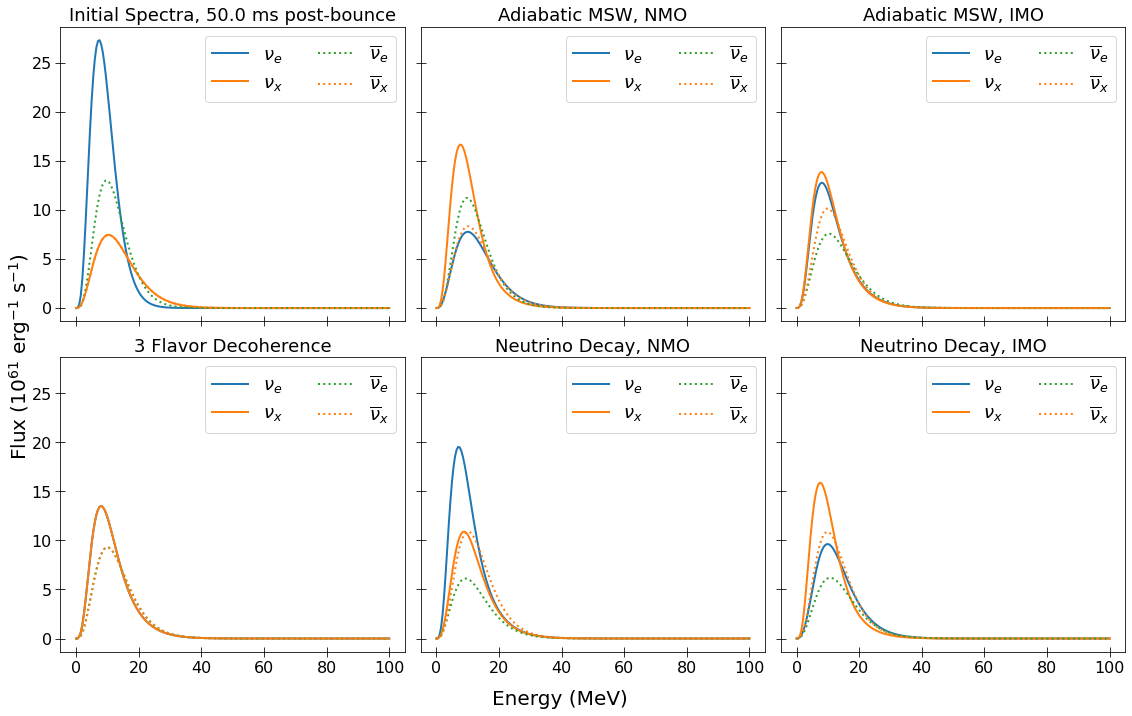

In [64]:
fig, (axes, axes1) = plt.subplots(2,3, figsize=(16,10), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec_m27, ospec_nmo_m27, ospec_imo_m27]):
    ax = axes[i]
    for flavor in Flavor:
        if flavor.is_electron and flavor.is_antineutrino:
            ax.plot(E, spec[flavor]/1e61, label=flavor.to_tex(), color='C2', ls=':', lw=2)
        else:
            ax.plot(E, spec[flavor]/1e61, label=flavor.to_tex(),
                   color='C0' if flavor.is_electron else 'C1',
                    ls='-' if flavor.is_neutrino else ':', lw=2)
        ax.tick_params(labelsize=16, direction='inout', length=10)
#     ax.set_xlabel(r'Energy ({})'.format(E.unit), fontsize=14)
    
    ax.set_title('Initial Spectra: {:.1f} post-bounce'.format(t) if i==0 
                   else 'Spectra at Earth: {:.1f} post-bounce'.format(t), fontsize=16)
    ax.legend(loc='upper right', ncol=2, fontsize=18)
axes[0].set_title('Initial Spectra, {:.1f} post-bounce'.format(t), fontsize=18)
axes[1].set_title('Adiabatic MSW, NMO'.format(t), fontsize=18)
axes[2].set_title('Adiabatic MSW, IMO'.format(t), fontsize=18)

for i, spec in enumerate([ospec_3f, ospec_nd_nmo, ospec_nd_imo]):
    ax = axes1[i]
    for flavor in Flavor:
        if flavor.is_electron and flavor.is_antineutrino:
            ax.plot(E, spec[flavor]/1e61, label=flavor.to_tex(), color='C2', ls=':', lw=2)
        else:
            ax.plot(E, spec[flavor]/1e61, label=flavor.to_tex(),
                   color='C0' if flavor.is_electron else 'C1',
                    ls='-' if flavor.is_neutrino else ':', lw=2)
#     ax.set_xlabel(r'Energy ({})'.format(E.unit), fontsize=16)
    ax.tick_params(labelsize=16, direction='inout', length=10)
    
#     ax.set_title('Initial Spectra: {:.1f} post-bounce'.format(t) if i==0 
#                    else 'Spectra at Earth: {:.1f} post-bounce'.format(t), fontsize=16)
    ax.legend(loc='upper right', ncol=2, fontsize=18)
    
axes1[0].set_title('3 Flavor Decoherence'.format(t), fontsize=18)
axes1[1].set_title('Neutrino Decay, NMO'.format(t), fontsize=18)
axes1[2].set_title('Neutrino Decay, IMO'.format(t), fontsize=18)    

ax = axes[0]
fig.supylabel(r'Flux (10$^{61}$ erg$^{-1}$ s$^{-1}$)', fontsize=20)
fig.supxlabel('Energy (MeV)', fontsize=20)
fig.tight_layout()
plt.savefig('plots/flavorTransform.png', facecolor='white', dpi=1200)

In [27]:
# Adiabatic MSW effect, IMO
xform_imo = AdiabaticMSW(mh=MassHierarchy.INVERTED)

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 50*u.ms

ispec_imo_m11 = m11.get_initial_spectra(t, E)
ospec_imo_m11 = m11.get_transformed_spectra(t, E, xform_imo)

ispec_imo_m27 = m27.get_initial_spectra(t, E)
ospec_imo_m27 = m27.get_transformed_spectra(t, E, xform_imo)

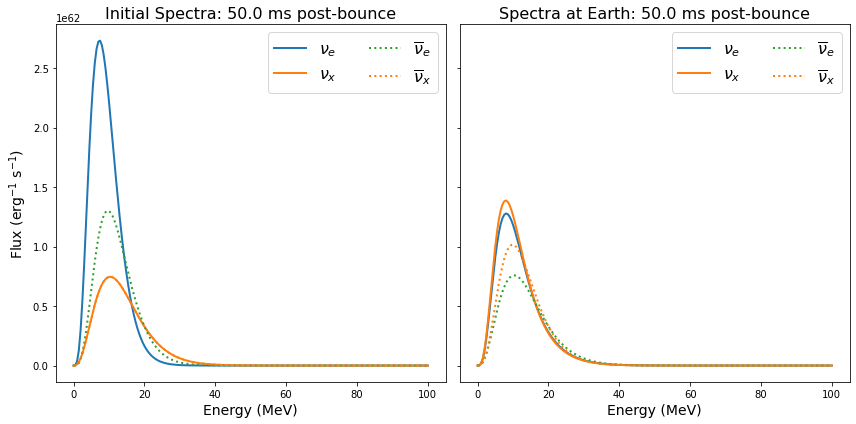

In [28]:
fig, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec_imo_m27, ospec_imo_m27]):
    ax = axes[i]
    for flavor in Flavor:
        if flavor.is_electron and flavor.is_antineutrino:
            ax.plot(E, spec[flavor], label=flavor.to_tex(), color='C2', ls=':', lw=2)
        else:
            ax.plot(E, spec[flavor], label=flavor.to_tex(),
                   color='C0' if flavor.is_electron else 'C1',
                    ls='-' if flavor.is_neutrino else ':', lw=2)
    ax.set_xlabel(r'Energy ({})'.format(E.unit), fontsize=14)
    ax.set_title('Initial Spectra: {:.1f} post-bounce'.format(t) if i==0 
                   else 'Spectra at Earth: {:.1f} post-bounce'.format(t), fontsize=16)
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set_ylabel(r'Flux (erg$^{-1}$ s$^{-1}$)', fontsize=14)
fig.tight_layout();

## Nakazato

In [7]:
Nakazato_2013.param

{'progenitor_mass': <Quantity [13., 20., 30., 50.] solMass>,
 'revival_time': <Quantity [  0., 100., 200., 300.] ms>,
 'metallicity': [0.02, 0.004],
 'eos': ['LS220', 'shen', 'togashi']}

### Metallicity = 0.02

In [14]:
# M_init = 13
z2_m13_100 = Nakazato_2013(progenitor_mass=13*u.solMass, revival_time=100*u.ms, metallicity=0.02, eos='shen')
z2_m13_200 = Nakazato_2013(progenitor_mass=13*u.solMass, revival_time=200*u.ms, metallicity=0.02, eos='shen')
z2_m13_300 = Nakazato_2013(progenitor_mass=13*u.solMass, revival_time=300*u.ms, metallicity=0.02, eos='shen')

nakazato-shen-z0.02-t_rev100ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev200ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev300ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [15]:
# M_init = 20
z2_m20_100 = Nakazato_2013(progenitor_mass=20*u.solMass, revival_time=100*u.ms, metallicity=0.02, eos='shen')
z2_m20_200 = Nakazato_2013(progenitor_mass=20*u.solMass, revival_time=200*u.ms, metallicity=0.02, eos='shen')
z2_m20_300 = Nakazato_2013(progenitor_mass=20*u.solMass, revival_time=300*u.ms, metallicity=0.02, eos='shen')

nakazato-shen-z0.02-t_rev200ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev300ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [16]:
# M_init = 30
z2_m30_100 = Nakazato_2013(progenitor_mass=30*u.solMass, revival_time=100*u.ms, metallicity=0.02, eos='shen')
z2_m30_200 = Nakazato_2013(progenitor_mass=30*u.solMass, revival_time=200*u.ms, metallicity=0.02, eos='shen')
z2_m30_300 = Nakazato_2013(progenitor_mass=30*u.solMass, revival_time=300*u.ms, metallicity=0.02, eos='shen')

nakazato-shen-z0.02-t_rev100ms-s30.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev200ms-s30.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev300ms-s30.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [17]:
# M_init = 50
z2_m50_100 = Nakazato_2013(progenitor_mass=50*u.solMass, revival_time=100*u.ms, metallicity=0.02, eos='shen')
z2_m50_200 = Nakazato_2013(progenitor_mass=50*u.solMass, revival_time=200*u.ms, metallicity=0.02, eos='shen')
z2_m50_300 = Nakazato_2013(progenitor_mass=50*u.solMass, revival_time=300*u.ms, metallicity=0.02, eos='shen')

nakazato-shen-z0.02-t_rev100ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev200ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.02-t_rev300ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

### Metallicity = 0.004

In [18]:
# M_init = 13
z4_m13_100 = Nakazato_2013(progenitor_mass=13*u.solMass, revival_time=100*u.ms, metallicity=0.004, eos='shen')
z4_m13_200 = Nakazato_2013(progenitor_mass=13*u.solMass, revival_time=200*u.ms, metallicity=0.004, eos='shen')
z4_m13_300 = Nakazato_2013(progenitor_mass=13*u.solMass, revival_time=300*u.ms, metallicity=0.004, eos='shen')

nakazato-shen-z0.004-t_rev100ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev200ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev300ms-s13.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [19]:
# M_init = 20
z4_m20_100 = Nakazato_2013(progenitor_mass=20*u.solMass, revival_time=100*u.ms, metallicity=0.004, eos='shen')
z4_m20_200 = Nakazato_2013(progenitor_mass=20*u.solMass, revival_time=200*u.ms, metallicity=0.004, eos='shen')
z4_m20_300 = Nakazato_2013(progenitor_mass=20*u.solMass, revival_time=300*u.ms, metallicity=0.004, eos='shen')

nakazato-shen-z0.004-t_rev100ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev200ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev300ms-s20.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [20]:
# M_init = 50
z4_m50_100 = Nakazato_2013(progenitor_mass=50*u.solMass, revival_time=100*u.ms, metallicity=0.004, eos='shen')
z4_m50_200 = Nakazato_2013(progenitor_mass=50*u.solMass, revival_time=200*u.ms, metallicity=0.004, eos='shen')
z4_m50_300 = Nakazato_2013(progenitor_mass=50*u.solMass, revival_time=300*u.ms, metallicity=0.004, eos='shen')

nakazato-shen-z0.004-t_rev100ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev200ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

nakazato-shen-z0.004-t_rev300ms-s50.0.fits:   0%|          | 0.00/36.6k [00:00<?, ?iB/s]

In [10]:
for flavor in Flavor:
    print(flavor)

Flavor.NU_E
Flavor.NU_X
Flavor.NU_E_BAR
Flavor.NU_X_BAR


## Inspired by Nakazato Fig. 12

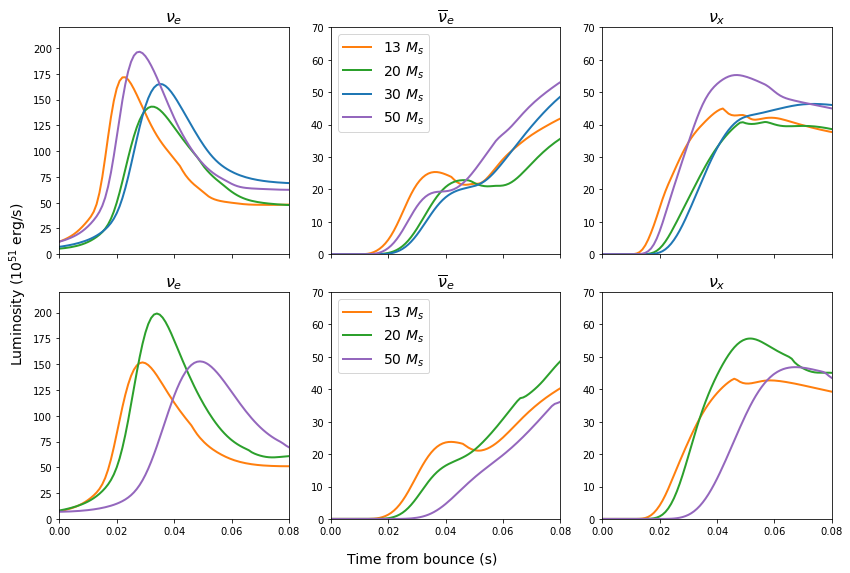

In [91]:
# Neutronization
fig, ((ax0, ax1, ax2),(ax00, ax11, ax22)) = plt.subplots(2, 3, figsize=(12,8), sharex=True)

#z=0.02
ax0.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_E]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax0.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_E]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax0.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_E]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax0.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_E]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax0.set_xlim(0, 0.08)
ax0.set_ylim(0,220)
ax0.set_title(Flavor.NU_E.to_tex(), fontsize=16)

ax1.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax1.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax1.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax1.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax1.set_ylim(0,70)
ax1.legend(fontsize=14)
ax1.set_title(Flavor.NU_E_BAR.to_tex(), fontsize=16)

ax2.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_X]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax2.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_X]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax2.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_X]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax2.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_X]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax2.set_ylim(0,70)
ax2.set_title(Flavor.NU_X.to_tex(), fontsize=16)


#z=0.004
ax00.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_E]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax00.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_E]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax00.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_E]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax00.set_xlim(0, 0.08)
ax00.set_ylim(0,220)
ax00.set_title(Flavor.NU_E.to_tex(), fontsize=16)

ax11.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax11.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax11.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax11.set_ylim(0,70)
ax11.legend(fontsize=14)
ax11.set_title(Flavor.NU_E_BAR.to_tex(), fontsize=16)

ax22.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_X]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax22.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_X]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax22.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_X]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax22.set_ylim(0,70)
ax22.set_title(Flavor.NU_X.to_tex(), fontsize=16)
# plt.title("PNS Cooling Phase", fontsize=16)
# plt.legend(ncol=2, fontsize=16)
fig.supxlabel('Time from bounce (s)', fontsize=14)
fig.supylabel(r'Luminosity ($10^{51}$ erg/s)', fontsize=14)
plt.tight_layout()
plt.savefig('plots/neutronization_lum_compare.png', facecolor='white', dpi=1200)

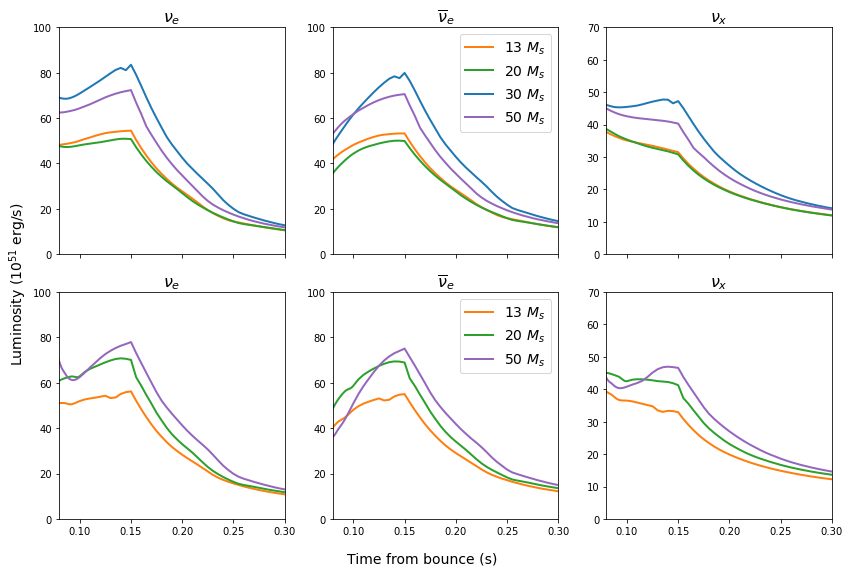

In [73]:
# Accretion
fig, ((ax0, ax1, ax2),(ax00, ax11, ax22)) = plt.subplots(2, 3, figsize=(12,8), sharex=True)

#z=0.02
ax0.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_E]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax0.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_E]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax0.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_E]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax0.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_E]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax0.set_xlim(0.08, 0.3)
ax0.set_ylim(0,100)
ax0.set_title(Flavor.NU_E.to_tex(), fontsize=16)

ax1.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax1.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax1.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax1.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax1.set_ylim(0,100)
ax1.legend(fontsize=14)
ax1.set_title(Flavor.NU_E_BAR.to_tex(), fontsize=16)

ax2.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_X]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax2.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_X]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax2.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_X]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax2.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_X]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax2.set_ylim(0,70)
ax2.set_title(Flavor.NU_X.to_tex(), fontsize=16)


#z=0.004
ax00.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_E]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax00.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_E]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax00.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_E]/1e51, label=r"50 $M_s$", lw=2, color='C4')
# ax00.set_xlim(0, 0.08)
ax00.set_ylim(0,100)
ax00.set_title(Flavor.NU_E.to_tex(), fontsize=16)

ax11.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax11.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax11.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax11.set_ylim(0,100)
ax11.legend(fontsize=14)
ax11.set_title(Flavor.NU_E_BAR.to_tex(), fontsize=16)

ax22.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_X]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax22.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_X]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax22.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_X]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax22.set_ylim(0,70)
ax22.set_title(Flavor.NU_X.to_tex(), fontsize=16)
# plt.title("PNS Cooling Phase", fontsize=16)
# plt.legend(ncol=2, fontsize=16)
fig.supxlabel('Time from bounce (s)', fontsize=14)
fig.supylabel(r'Luminosity ($10^{51}$ erg/s)', fontsize=14)
plt.tight_layout()
plt.savefig('plots/accretion_lum_compare.png', facecolor='white', dpi=1200)

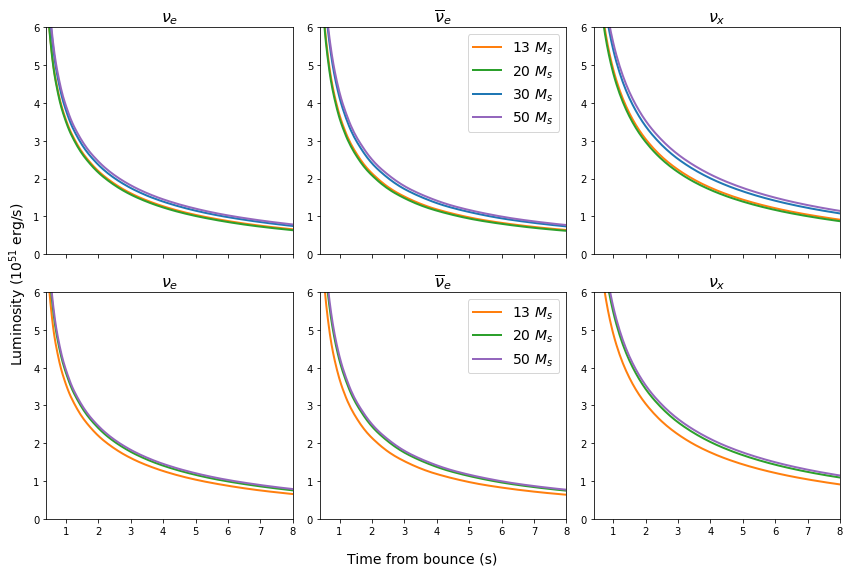

In [85]:
# PNS Cooling
fig, ((ax0, ax1, ax2),(ax00, ax11, ax22)) = plt.subplots(2, 3, figsize=(12,8), sharex=True)

#z=0.02
ax0.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_E]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax0.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_E]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax0.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_E]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax0.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_E]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax0.set_xlim(0.4, 8)
ax0.set_ylim(0,6)
ax0.set_title(Flavor.NU_E.to_tex(), fontsize=16)

ax1.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax1.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax1.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax1.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax1.set_ylim(0,6)
# ax1.set_yscale('log')
ax1.legend(fontsize=14)
ax1.set_title(Flavor.NU_E_BAR.to_tex(), fontsize=16)

ax2.plot(z2_m13_100.time, z2_m13_100.luminosity[Flavor.NU_X]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax2.plot(z2_m20_100.time, z2_m20_100.luminosity[Flavor.NU_X]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax2.plot(z2_m30_100.time, z2_m30_100.luminosity[Flavor.NU_X]/1e51, label=r"30 $M_s$", lw=2, color='C0')
ax2.plot(z2_m50_100.time, z2_m50_100.luminosity[Flavor.NU_X]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax2.set_ylim(0,6)
ax2.set_title(Flavor.NU_X.to_tex(), fontsize=16)


#z=0.004
ax00.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_E]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax00.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_E]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax00.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_E]/1e51, label=r"50 $M_s$", lw=2, color='C4')
# ax00.set_xlim(0, 0.08)
ax00.set_ylim(0,6)
ax00.set_title(Flavor.NU_E.to_tex(), fontsize=16)

ax11.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax11.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax11.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_E_BAR]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax11.set_ylim(0,6)
ax11.legend(fontsize=14)
ax11.set_title(Flavor.NU_E_BAR.to_tex(), fontsize=16)

ax22.plot(z4_m13_100.time, z4_m13_100.luminosity[Flavor.NU_X]/1e51, label=r"13 $M_s$", lw=2, color='C1')
ax22.plot(z4_m20_100.time, z4_m20_100.luminosity[Flavor.NU_X]/1e51, label=r"20 $M_s$", lw=2, color='C2')
ax22.plot(z4_m50_100.time, z4_m50_100.luminosity[Flavor.NU_X]/1e51, label=r"50 $M_s$", lw=2, color='C4')
ax22.set_ylim(0,6)
ax22.set_title(Flavor.NU_X.to_tex(), fontsize=16)
# plt.title("PNS Cooling Phase", fontsize=16)
# plt.legend(ncol=2, fontsize=16)
fig.supxlabel('Time from bounce (s)', fontsize=14)
fig.supylabel(r'Luminosity ($10^{51}$ erg/s)', fontsize=14)
plt.tight_layout()
# plt.savefig('plots/pnscooling_lum_compare.png', facecolor='white', dpi=1200)

In [43]:
# 100 ms, z=0.02
nak20 = Nakazato_2013(progenitor_mass=20*u.solMass, revival_time=100*u.ms, metallicity=0.02, eos='shen')

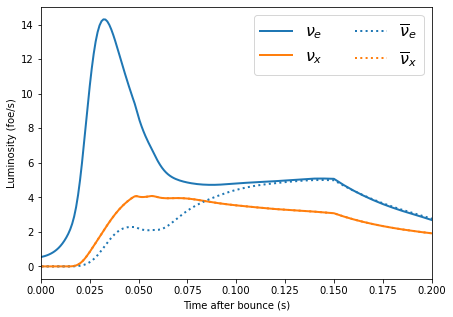

In [39]:
plt.figure(figsize=(7,5))
for flavor in Flavor:
    plt.plot(nak20.time, nak20.luminosity[flavor]/1e52, label=flavor.to_tex(),
              color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2)
plt.xlim(0, 0.2)
# plt.ylim(1e-1,50)
# plt.yscale('log')
plt.xlabel("Time after bounce (s)")
plt.ylabel("Luminosity (foe/s)")
plt.legend(ncol=2, fontsize=16)